# Exploratory Data Analysis on AdventureWorks2017 - Sales

Note that the dataset used is pre-processed by denormalizing the combined sales headers and details and its supplement information

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

In [2]:
sales = pd.read_csv('staging/STG_Sales.csv', parse_dates=['OrderDate'])
sales.head().transpose()

,0,1,2,3,4
SalesOrderID,43659,43659,43659,43659,43659
OrderDate,2011-05-31 00:00:00,2011-05-31 00:00:00,2011-05-31 00:00:00,2011-05-31 00:00:00,2011-05-31 00:00:00
OnlineOrderFlag,False,False,False,False,False
SubTotal,20565.6,20565.6,20565.6,20565.6,20565.6
TaxAmt,1971.51,1971.51,1971.51,1971.51,1971.51
Freight,616.098,616.098,616.098,616.098,616.098
TotalDue,23153.2,23153.2,23153.2,23153.2,23153.2
AccountNumber,AW00029825,AW00029825,AW00029825,AW00029825,AW00029825
CustType,SC,SC,SC,SC,SC
CustName,James Hendergart,James Hendergart,James Hendergart,James Hendergart,James Hendergart


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 26 columns):
SalesOrderID          121317 non-null int64
OrderDate             121317 non-null datetime64[ns]
OnlineOrderFlag       121317 non-null bool
SubTotal              121317 non-null float64
TaxAmt                121317 non-null float64
Freight               121317 non-null float64
TotalDue              121317 non-null float64
AccountNumber         121317 non-null object
CustType              121317 non-null object
CustName              121317 non-null object
SalesPersonName       60919 non-null object
Territory             121317 non-null object
Country               121317 non-null object
SalesOrderDetailID    121317 non-null int64
OrderQty              121317 non-null int64
UnitPrice             121317 non-null float64
UnitPriceDiscount     121317 non-null float64
LineTotal             121317 non-null float64
Product               121317 non-null object
StandardCost          121

### Additional Features

In [4]:
# Sales Channel (online / reseller)
sales['Channel'] = sales['OnlineOrderFlag'].map({True:'Online', False:'Retailer'}).astype('category')
print(sales['Channel'].value_counts())

Retailer    60919
Online      60398
Name: Channel, dtype: int64


In [5]:
# Sales Territory Type (domestic / international)
sales['TerritoryType'] = sales['Country'].apply(lambda x: 'Domestic' if x == 'US' else 'International').astype('category')
print(sales['TerritoryType'].value_counts())

International    61164
Domestic         60153
Name: TerritoryType, dtype: int64


In [6]:
sales['LineCost'] = sales['StandardCost']*sales['OrderQty']
sales['LineProfit'] = sales['LineTotal'] - sales['LineCost']
sales['LineDiscount'] = (sales['ListPrice'] - sales['UnitPrice'])*sales['OrderQty']

### Sales Header aggregation
Aggregate the totals of LineTotal, LineCost, LineProfit, and LineDiscount at sales header level

In [7]:
saleshd = sales[['SalesOrderID','OrderDate','Territory','Country','Channel','TerritoryType']].drop_duplicates()
saleshd = saleshd.join(
    sales.groupby('SalesOrderID')[['LineTotal','LineCost','LineProfit','LineDiscount']].sum(), 
    on='SalesOrderID'
).set_index('SalesOrderID')
saleshd.rename({'LineTotal': 'SalesAmount', 'LineCost': 'CostAmount',
                'LineProfit': 'ProfitAmount', 'LineDiscount':'DiscountAmount'}, axis=1, inplace=True)
saleshd.head()

,OrderDate,Territory,Country,Channel,TerritoryType,SalesAmount,CostAmount,ProfitAmount,DiscountAmount
SalesOrderID,,,,,,,,,
43659,2011-05-31,Southeast,US,Retailer,Domestic,20565.6206,19291.7808,1273.8398,13724.1794
43660,2011-05-31,Southeast,US,Retailer,Domestic,1294.2529,1371.4149,-77.1620,946.7271
43661,2011-05-31,Canada,CA,Retailer,International,32726.4786,30877.8325,1848.6461,22635.6214
43662,2011-05-31,Canada,CA,Retailer,International,28832.5289,30933.0451,-2100.5162,21859.7011
43663,2011-05-31,Southwest,US,Retailer,Domestic,419.4589,486.7066,-67.2477,363.5311


# Sales by Channel & Territory

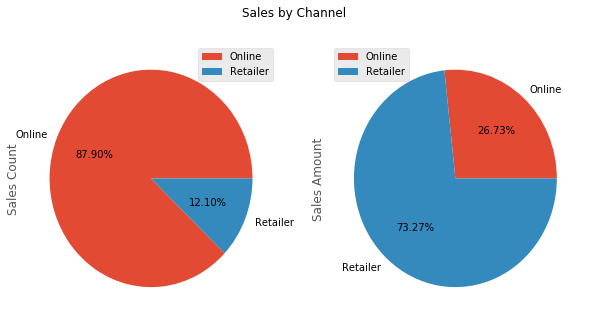

In [8]:
sales_by_channel = saleshd.groupby('Channel')['SalesAmount'].agg(['count','sum'])
sales_by_channel.columns = ['Sales Count','Sales Amount']
sales_by_channel.plot.pie(subplots=True, figsize=(10,5), title='Sales by Channel', autopct='%.2f%%');

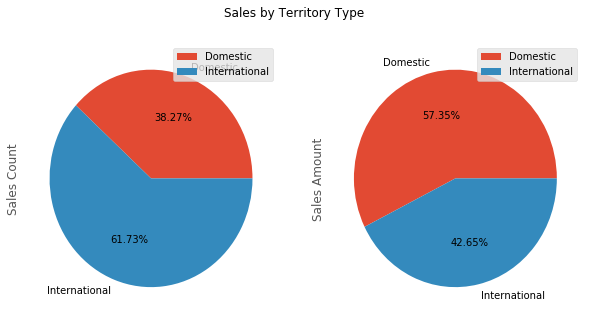

In [9]:
sales_by_terr = saleshd.groupby('TerritoryType')['SalesAmount'].agg(['count','sum'])
sales_by_terr.columns = ['Sales Count','Sales Amount']
sales_by_terr.plot.pie(subplots=True, figsize=(10,5), title='Sales by Territory Type', autopct='%.2f%%');

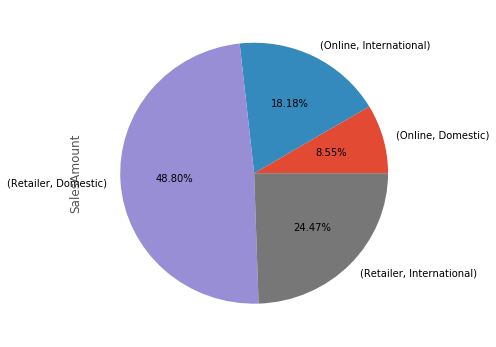

In [10]:
df = saleshd.groupby(['Channel','TerritoryType'])['SalesAmount'].sum()
df.plot(kind='pie', subplots=True, figsize=(6,6), autopct='%.2f%%');

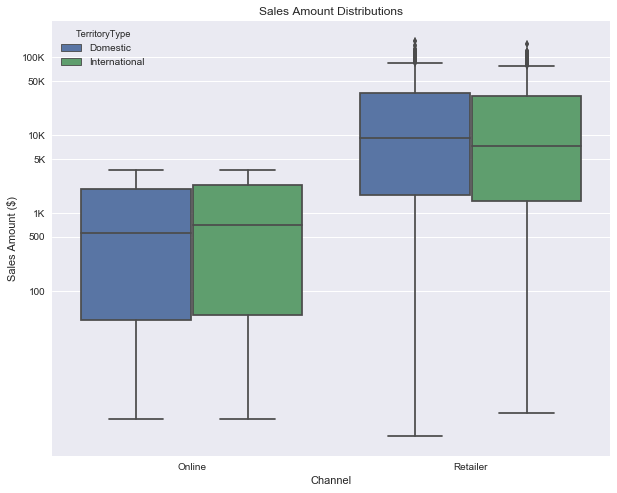

In [11]:
sns.set()
plt.figure(figsize=(10,8))

sns.boxplot(x='Channel',y='SalesAmount', hue='TerritoryType', data=saleshd)
plt.ylabel('Sales Amount ($)')
plt.yscale('log')
plt.yticks([100,500,1000,5000,10000,50000,100000],
          ['100','500','1K','5K','10K','50K','100K'])
plt.title('Sales Amount Distributions');

In [12]:
df = saleshd.groupby(['TerritoryType','Territory','Channel'])['SalesAmount'].sum().astype(int)
df = df.unstack()
# translate to 1000 unit
df = df / 1000
df

Channel                         Online   Retailer
TerritoryType Territory                          
Domestic      Central            3.000   7906.008
              Northeast          6.532   6932.842
              Northwest       3649.866  12435.075
              Southeast         12.238   7867.416
              Southwest       5718.150  18466.458
International Australia       9061.000   1594.335
              Canada          1977.844  14377.925
              France          2644.017   4607.537
              Germany         2894.312   2021.095
              United Kingdom  3391.712   4279.008

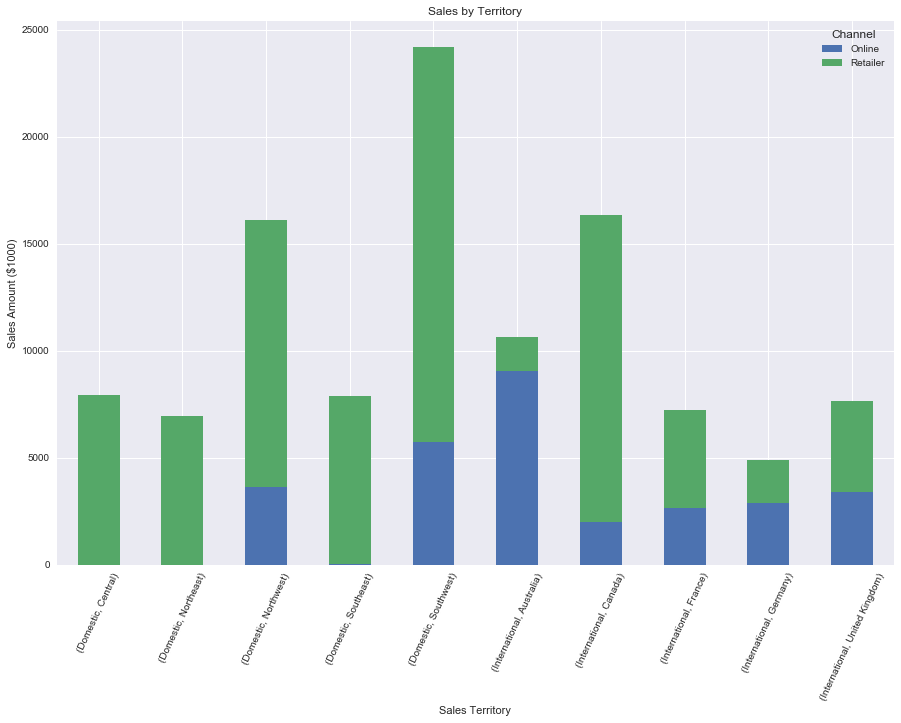

In [13]:
ax = df.plot.bar(stacked=True, rot=65, figsize=(15,10), title='Sales by Territory')

ax.set_ylabel('Sales Amount ($1000)')
ax.set_xlabel('Sales Territory');
ax.set_yticks([1000,10000],['1000','10000']);

# Time Series

In [14]:
daily_sales = saleshd.groupby('OrderDate')['SalesAmount'].sum()
daily_sales.head()

OrderDate
2011-05-31    503805.9169
2011-06-01     13931.5200
2011-06-02     15012.1782
2011-06-03      7156.5400
2011-06-04     15012.1782
Name: SalesAmount, dtype: float64

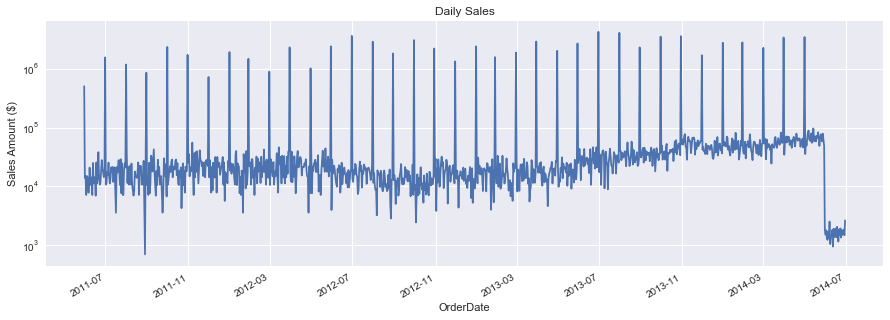

In [15]:
ax = daily_sales.plot(figsize=(15,5), logy=True, title='Daily Sales')
ax.set_ylabel('Sales Amount ($)');

Well, it looks like the spikes come in periodically. That's likely to be the orders from Retailer channel. I'll just have to resample it to monthly, and separate the lines by channel.

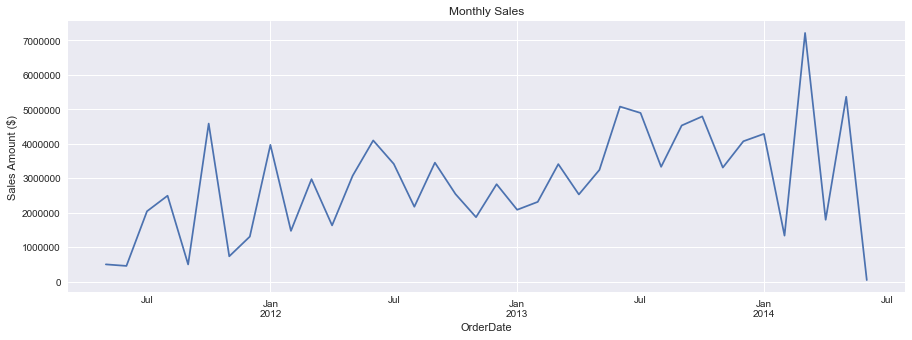

In [16]:
ax = daily_sales.resample('M').sum().plot(figsize=(15,5), title='Monthly Sales')
ax.set_ylabel('Sales Amount ($)');

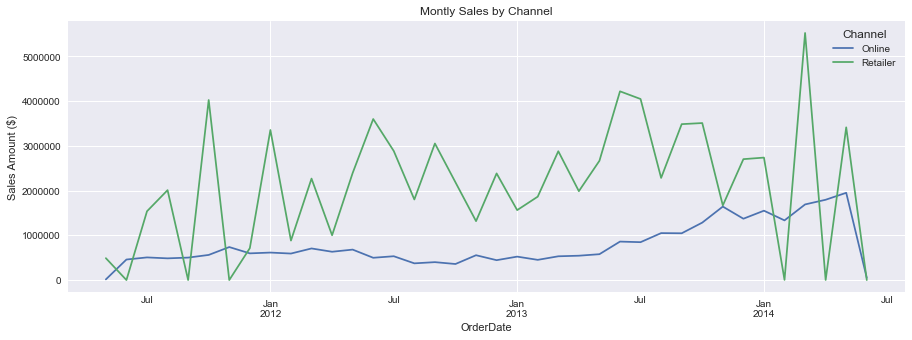

In [17]:
df = saleshd.groupby(['OrderDate','Channel'])['SalesAmount'].sum()
ax = df.unstack().resample('M').sum().plot(figsize=(15,5), title='Montly Sales by Channel');
ax.set_ylabel('Sales Amount ($)');

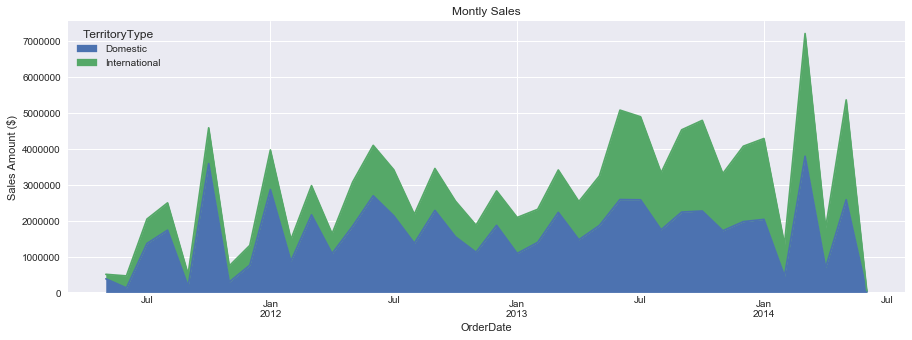

In [18]:
# Stacked area chart
df = saleshd.groupby(['OrderDate','TerritoryType'])['SalesAmount'].sum()
ax = df.unstack().resample('M').sum().plot.area(figsize=(15,5), title='Montly Sales');
ax.set_ylabel('Sales Amount ($)');

## Pairplot

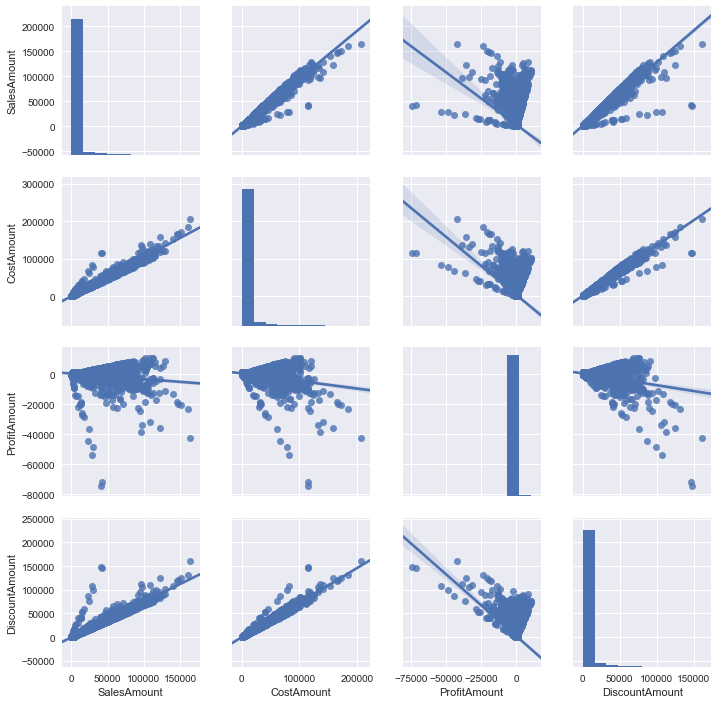

In [19]:
sns.pairplot(saleshd, kind='reg');

## Linear regressions

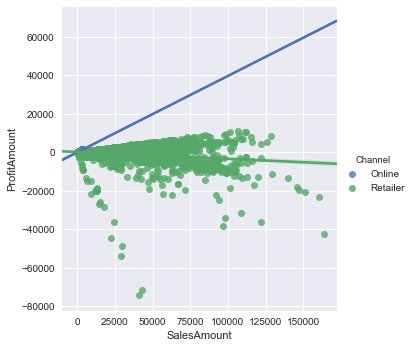

In [20]:
sns.lmplot(x='SalesAmount', y='ProfitAmount', hue='Channel', data=saleshd);

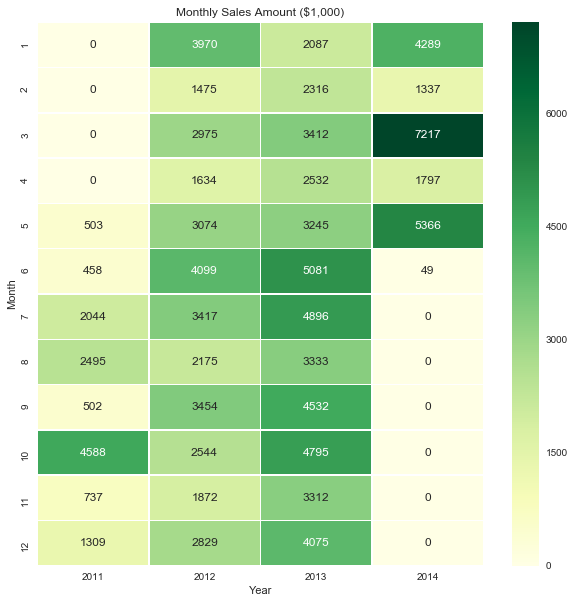

In [21]:
monthly_sales = saleshd.groupby('OrderDate')['SalesAmount'].sum()
monthly_sales = monthly_sales.resample('M').sum().reset_index()
monthly_sales['Month'] = monthly_sales.OrderDate.dt.month #strftime('%b')
monthly_sales['Year'] = monthly_sales.OrderDate.dt.year
t = monthly_sales.pivot('Month','Year','SalesAmount').fillna(0)

# # convert unit to thousands and round
t = (t / 1000).astype(int)
f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(t, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='YlGn');
ax.set_title('Monthly Sales Amount ($1,000)');

## Sales by Product Category

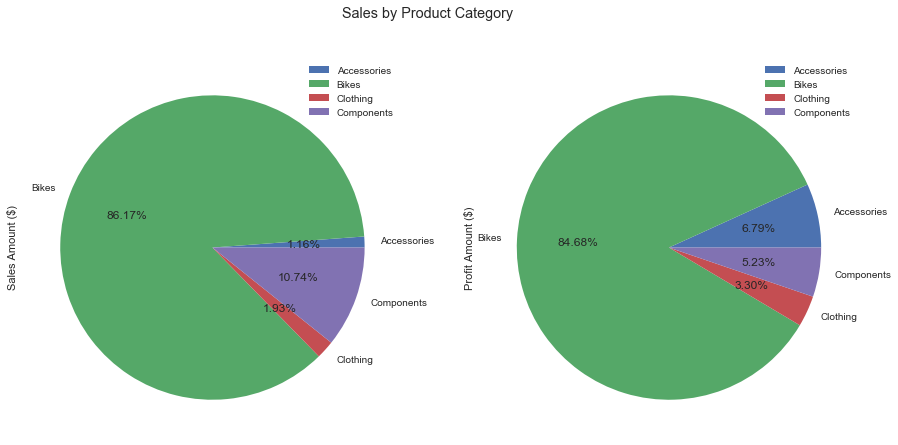

In [22]:
df = sales.groupby('ProductCategory')[['LineTotal','LineProfit']].sum() 
ax = df.plot.pie(subplots=True, figsize=(15,7), title='Sales by Product Category', autopct='%.2f%%');
ax[0].set_ylabel('Sales Amount ($)')
ax[1].set_ylabel('Profit Amount ($)');

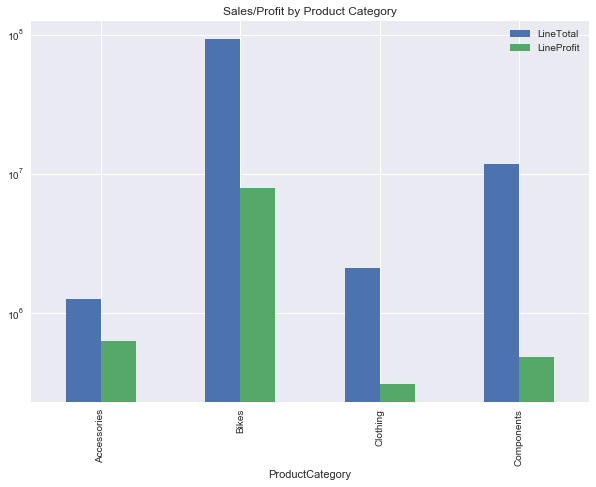

In [23]:
df.plot.bar(figsize=(10,7), logy=True, title='Sales/Profit by Product Category');

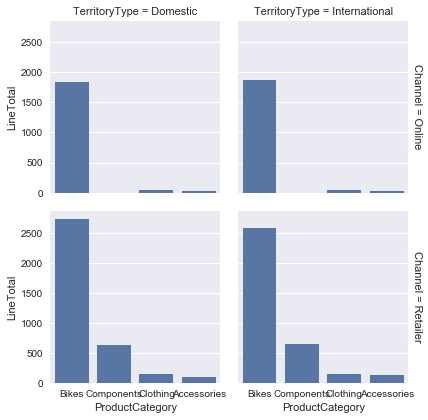

In [24]:
g = sns.FacetGrid(data=sales, row='Channel', col='TerritoryType', margin_titles=True)
g = g.map(sns.barplot, 'ProductCategory', 'LineTotal', ci=False, order=['Bikes','Components','Clothing','Accessories']);

Text(0,0.5,'Sales Amount ($)')

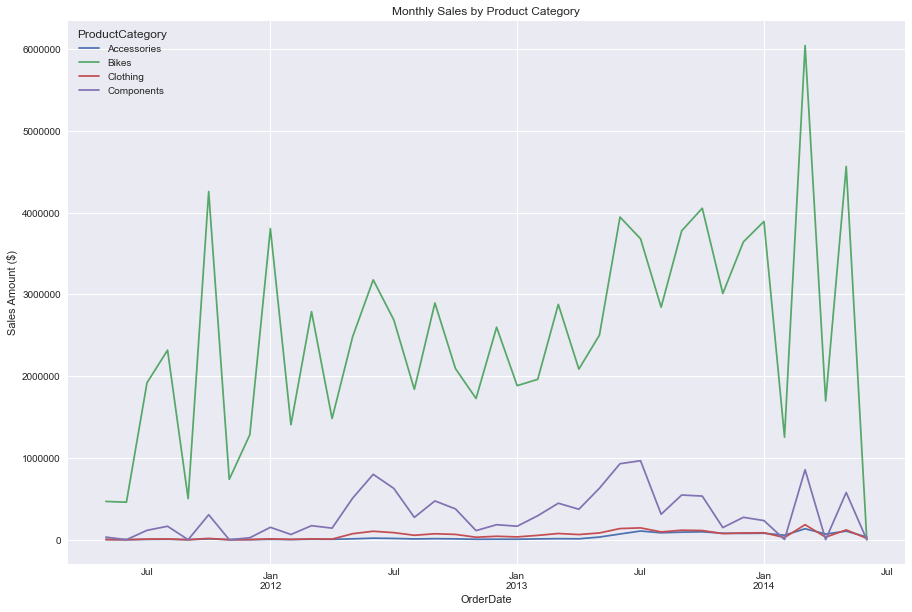

In [25]:
df2 = sales.groupby(['OrderDate','ProductCategory'])['LineTotal'].sum()
ax = df2.unstack().resample('M').sum().plot(figsize=(15,10), title='Monthly Sales by Product Category')
ax.set_ylabel('Sales Amount ($)')